# Kaggle Playground Season 5 Episode 2: Podcast Listening Time Prediction

# Imports

In [27]:
# !pip install missingno
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 3.1 MB/s eta 0:00:0000:0100:01


In [28]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import sweetviz as sv

# from ydata_profiling import ProfileReport


# Data Loading

In [2]:
train = pd.read_csv('train.csv')
train

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


# Data Description
## First Impression
1. ID - Useless this is for prediction
2. Podcast Name - Maybe certain podcasts have more dedicated viewers, maybe some have less dedicated video (Niche podcasts [Dedicated] vs General podcasts)
3. Episode Title - Perhaps Useless > Charts will help > maybe episode 1 has lower %listening time
4. Episode Length - This looks like it'll be the strongest variable.
5. Genre - Maybe similar to podcast name?
6. Host Popularity Percentage - Might be useful > Charts will help (Maybe needs to be used in conjuction to guest popularity) a x b
7. Publication Day - My initial thoughts is that this should have no impact
8. Publication Time - My initial thoughts is that this also should have no impact
9. Guest Popularity Percentage - Similar with host -- new idea that maybe you take the higher value of whatevers offered...? or lower ? >> I.e. My favourite podcast host is Taylor swift (yay!) but she is doing a podcast with Elon must (boo!) will my distaste for Elon trump my love for Taylor Swift?
10. Number of Ads - Might be bad, but also could be an indication that a podcast is successful that is has ads . . .
11. Episode Sentiment - Is it talking about what people thought, or the vibe of the pod? If so, it may explain itself.
12. Listening Time Minutes - Outcome variable.


# Data Exploration

In [8]:
train.sample(10)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
346976,346976,Learning Lab,Episode 26,NaN,Education,82.12,Thursday,Morning,NaN,1.0,Positive,0.00000
549193,549193,Tech Talks,Episode 94,30.94,Technology,65.23,Wednesday,Afternoon,73.93,3.0,Neutral,16.08483
551391,551391,Business Insights,Episode 30,108.74,Business,28.99,Friday,Afternoon,14.98,1.0,Neutral,81.41000
413961,413961,Gadget Geek,Episode 50,NaN,Technology,80.72,Wednesday,Afternoon,NaN,0.0,Positive,41.02628
184298,184298,Laugh Line,Episode 78,15.09,Comedy,74.28,Sunday,Afternoon,96.36,3.0,Negative,5.64180
326097,326097,Home & Living,Episode 98,51.45,Lifestyle,87.44,Saturday,Morning,45.75,3.0,Negative,27.71945
513920,513920,Sound Waves,Episode 15,102.60,Music,66.27,Wednesday,Afternoon,7.56,0.0,Negative,62.78125
202855,202855,Finance Focus,Episode 3,114.33,Business,25.55,Friday,Morning,NaN,0.0,Positive,72.98303
189732,189732,Sports Weekly,Episode 63,89.82,Sports,46.79,Sunday,Evening,76.57,2.0,Negative,69.40758
560143,560143,Digital Digest,Episode 43,25.86,Technology,42.74,Sunday,Morning,73.61,3.0,Neutral,21.37449


#### A Random Sample of 10, shows some missing values, lets look deeply into missing values, and perhaps look into imputation

<Axes: >

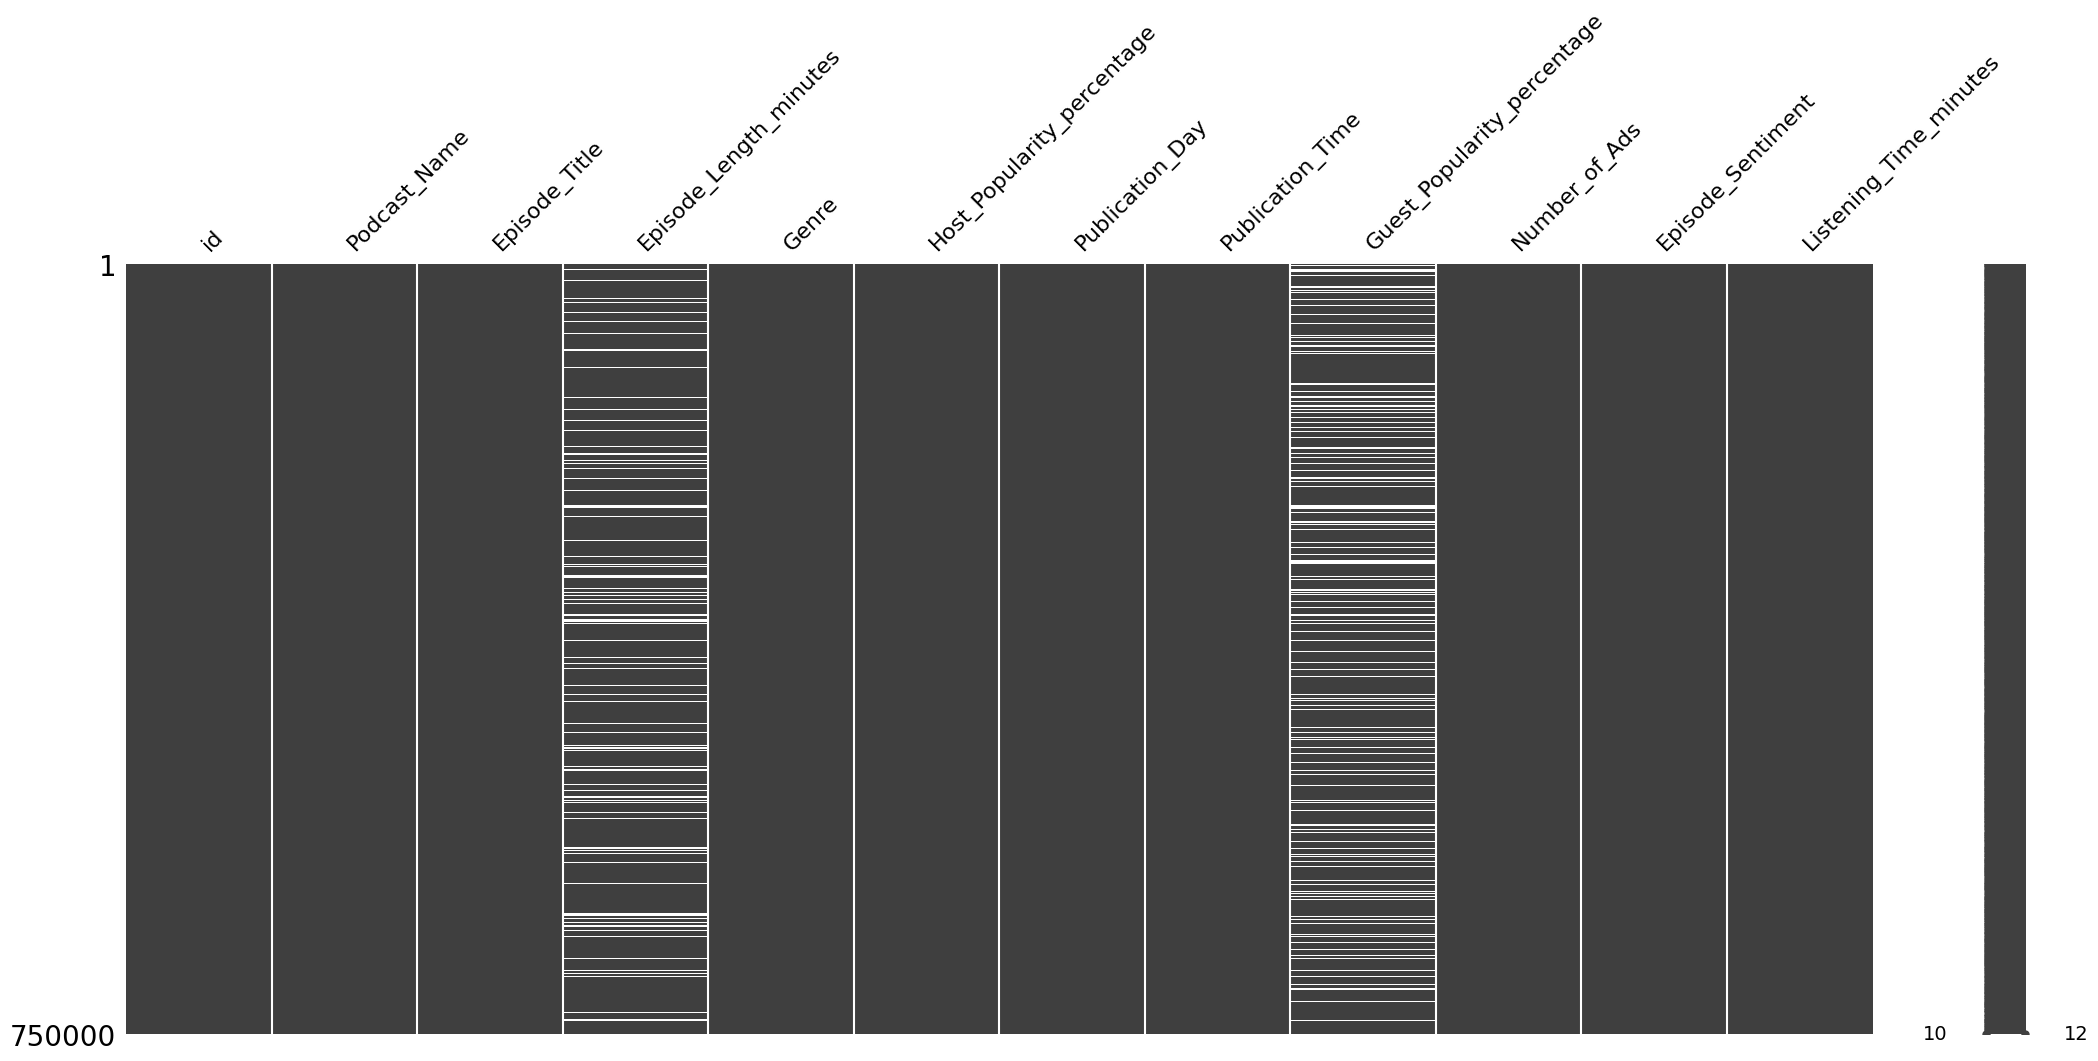

In [6]:
msno.matrix(train)

**Guest Popularity Percent**: This might be missing due to the absense of a guest? Not sure how it would be imputed > == Host popularity maybe ?

**Episode Length Minutes**: Complicated. Firstly, if listening time is also 0, maybe the whole thing can be dropped? Another idea after the next

Impute the average based on a matching podcast name? Priority podcast name? no match genre? [[explore the data in depth before making a decision]]

In [34]:
train[train['Episode_Length_minutes'].isna()]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
9,9,Music Matters,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761
29,29,Health Hour,Episode 38,NaN,Health,45.97,Saturday,Evening,15.43,1.0,Negative,25.38384
43,43,Funny Folks,Episode 93,NaN,Comedy,33.02,Saturday,Afternoon,64.70,2.0,Positive,35.11072
49,49,Style Guide,Episode 75,NaN,Lifestyle,78.82,Saturday,Morning,NaN,2.0,Positive,24.40379
...,...,...,...,...,...,...,...,...,...,...,...,...
749926,749926,Current Affairs,Episode 48,NaN,News,78.14,Thursday,Afternoon,50.88,3.0,Positive,14.67000
749936,749936,Melody Mix,Episode 7,NaN,Music,29.15,Sunday,Afternoon,NaN,0.0,Negative,47.79899
749943,749943,World Watch,Episode 42,NaN,News,80.46,Saturday,Afternoon,15.18,1.0,Neutral,80.42861
749954,749954,Life Lessons,Episode 54,NaN,Lifestyle,59.31,Tuesday,Night,44.94,2.0,Neutral,99.33292


In [44]:
dupe_rows = train[train.duplicated(subset=["Podcast_Name", "Episode_Title"], keep=False)]
grouped_dupes = dupe_rows.groupby(["Podcast_Name", "Episode_Title"])
grouped_dupes

In [1]:
import plotly.express as px

# Step 1: Filter the data
filtered = train[
    (train["Podcast_Name"] == "Athlete's Arena") &
    (train["Episode_Title"] == "Episode 2")
].reset_index(drop=True)

# Step 2: Add an 'Instance' column to track each row
filtered["Instance"] = filtered.index

# Step 3: Melt the DataFrame
melted = filtered.melt(
    id_vars="Instance",
    value_vars=["Episode_Length_minutes", "Listening_Time_minutes"],
    var_name="Metric",
    value_name="Minutes"
)

fig = px.bar(
    melted,
    x="Instance",
    y="Minutes",
    color="Metric",
    barmode="group",
    title="Episode vs Listening Time — 'Athlete's Arena: Episode 1'",
    labels={"Instance": "Instance #", "Minutes": "Minutes"}
)

fig.show()
TextDisplayObject

NameError: name 'train' is not defined

So firstly... Podcast Name and Episode Title have so many duplicated entries, in the specific columns, but not for their entire row. A quick check of all the different variations of the same episode name and Podcast names show vastly different entries. Thus this should **not** be used for imputation of missing data. But it does briefly indicate a potential pattern in the ratio. Soke further analysis of the ratios and their combinations could determine what could be a good imputation method (or prove that no reliable ones exist)

In [54]:
# Filter for valid episode lengths
Train_clean = train[
    (train["Episode_Length_minutes"].notna()) &
    (train["Episode_Length_minutes"] > 0)
].copy()

# Create the ratio
Train_clean["listen_ratio"] = Train_clean["Listening_Time_minutes"] / Train_clean["Episode_Length_minutes"]

# Select only numeric columns
numerics = Train_clean.select_dtypes(include="number")

# Include the ratio in the set
correlation_matrix = numerics.corr()

# Sort by listen_ratio
correlation_matrix["listen_ratio"].sort_values(ascending=False)


listen_ratio                   1.000000
Listening_Time_minutes         0.418532
Episode_Length_minutes         0.207813
Host_Popularity_percentage     0.032335
id                            -0.000610
Guest_Popularity_percentage   -0.001273
Number_of_Ads                 -0.109584
Name: listen_ratio, dtype: float64

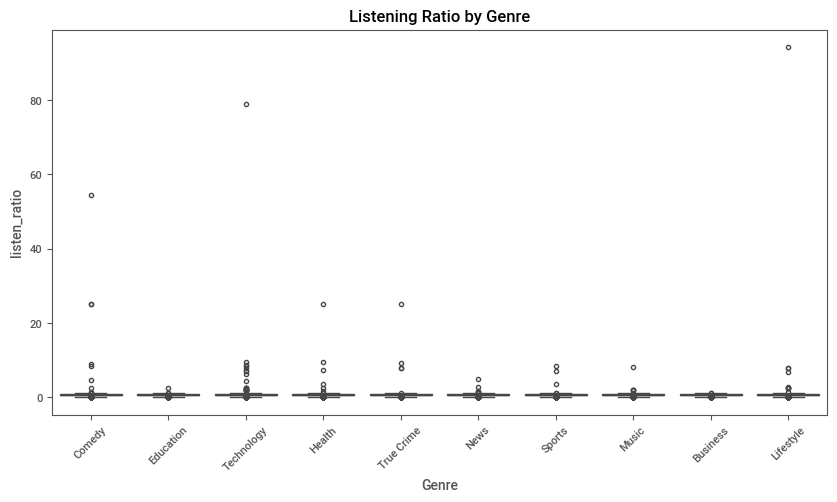

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=Train_clean, x="Genre", y="listen_ratio")
plt.xticks(rotation=45)
plt.title("Listening Ratio by Genre")
plt.show()





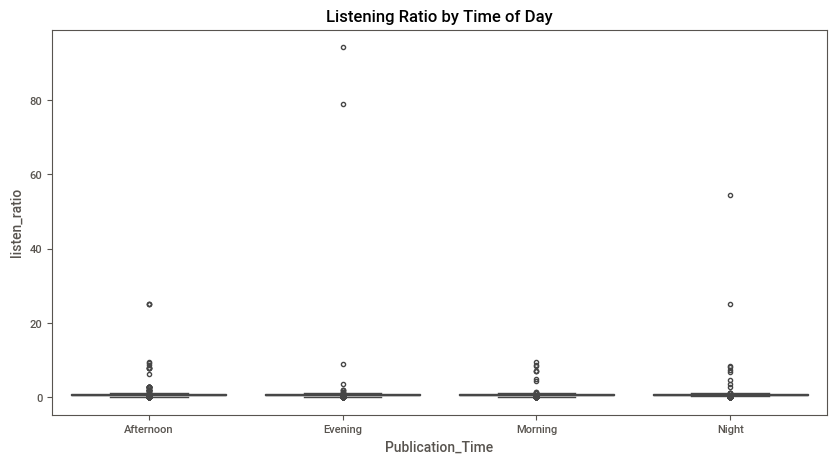

In [56]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=Train_clean, x="Publication_Time", y="listen_ratio")
plt.title("Listening Ratio by Time of Day")
plt.show()

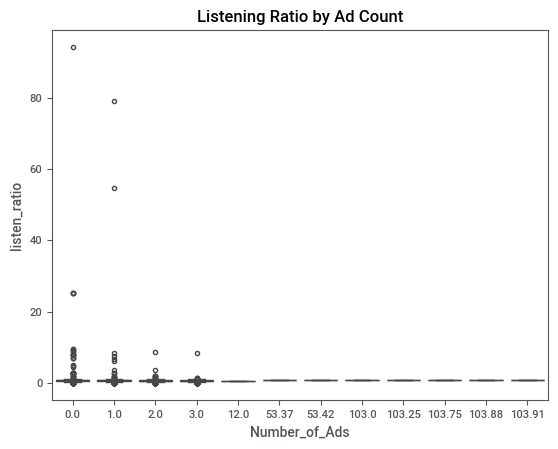

In [57]:
sns.boxplot(data=Train_clean, x="Number_of_Ads", y="listen_ratio")
plt.title("Listening Ratio by Ad Count")
plt.show()

In [30]:
# Analyse the dataset
report = sv.analyze(train)

# Show in browser or save
report.show_html("sweetviz_podcast_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_podcast_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
